# STOCHASTIC GRADIENT DESCENT

**Author:** _Souhail OUMAMA_  
**Based on original lab by:** _Olivier FERCOQ_

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
###############################################################################
#            Toy dataset
###############################################################################

n_samples = 2000
n_features = 100
n_iter = 2500  # number of iterations
gamma = 2  # suggested step size


def gamma(t):
    return 1. / (100 + t)

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples) * 1e-5
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'
# loss = 'hinge'  # QUESTION 4

In [11]:
############################################################################
#                Stochastic gradient
############################################################################


def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))


def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = np.mean(np.dot(X,w)-y); # QUESTIONS 2 et 3
            
            # Question 7
            if alpha != 0 : 
                pobj[t]  += alpha / 2 * np.mean(np.dot(w, w) ** 2)
                gradient += gradient + alpha * w
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 12
            raise NotImplementedError('QUESTION 12')
        #w -= gamma_func(t) * gradient
        w -= gamma * gradient
        if average is True:
            raise NotImplementedError('QUESTION 10')

        #if alpha > 0:
            #raise NotImplementedError('QUESTION 7')
        
        
        all_w[t] = w
    return w, all_w, pobj

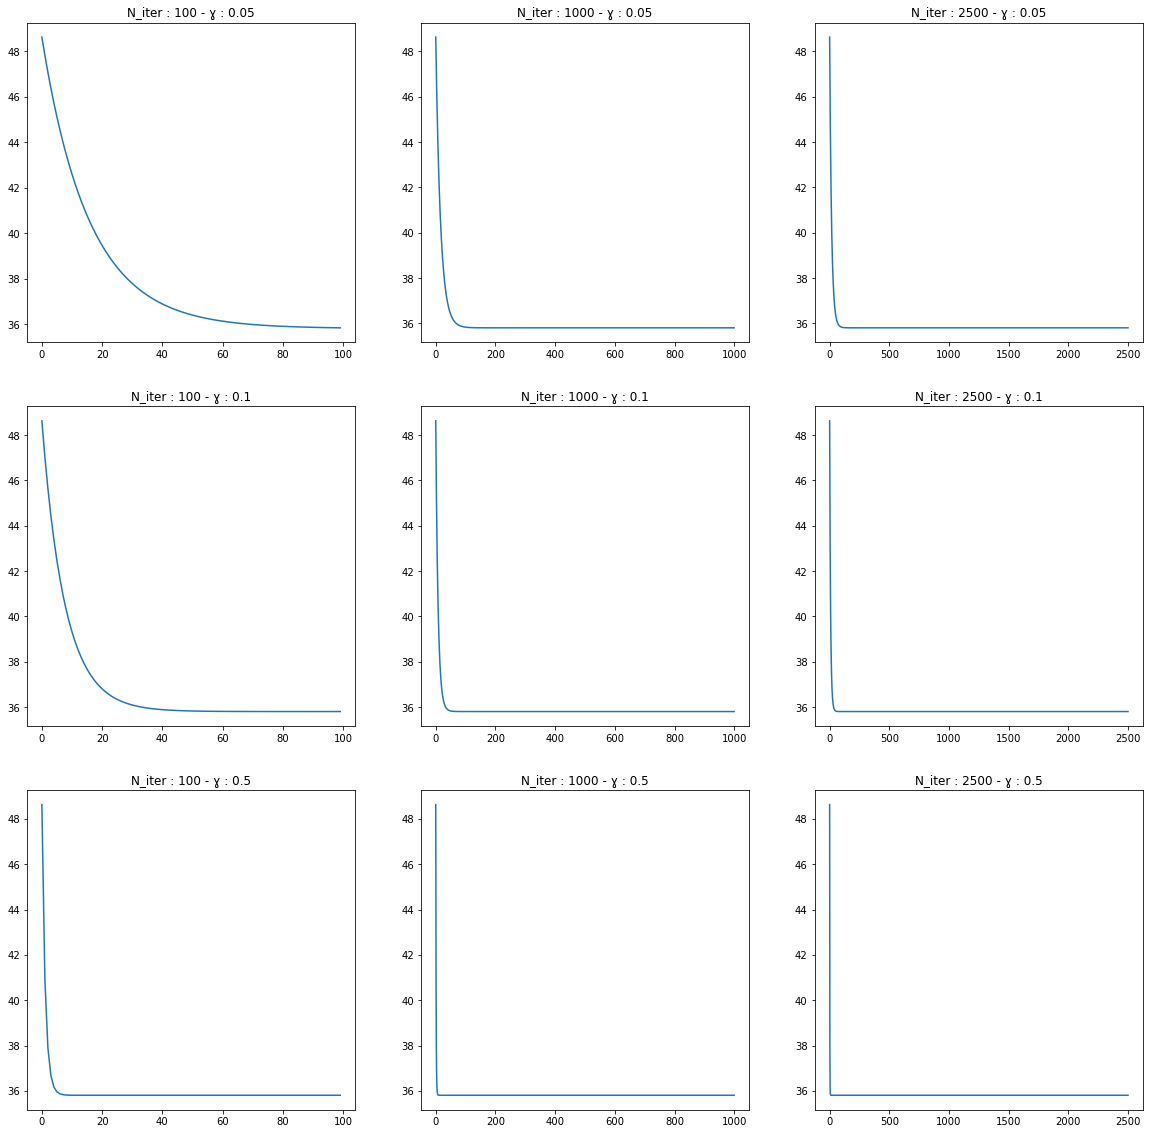

In [4]:
## QUESTION 6 -- Finding the best N_iter, ɣ

fig, axs = plt.subplots(3,3, sharex='col', figsize=(20,20))
n_iters = [100, 1000, 2500]
gammas = [0.05, 0.1, .5]
k=0
for j in range(len(gammas)) : 
    for i in range(len(n_iters)):
        k+=1
        n_iter = n_iters[i]
        gamma = gammas[j]
        ax = plt.subplot(3,3,k, title="N_iter : {} - ɣ : {}".format(n_iter, gamma))        
        w_ini = np.zeros(X_toy.shape[1] + 1)
        w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                                 loss=loss, alpha=0, average=False)
        ax.plot(pobj)
        #ax.yscale('log')
        #ax.xlabel('t')
        #ax.ylabel('cost')
        #ax.title('%s stochastic (toy)' % loss)

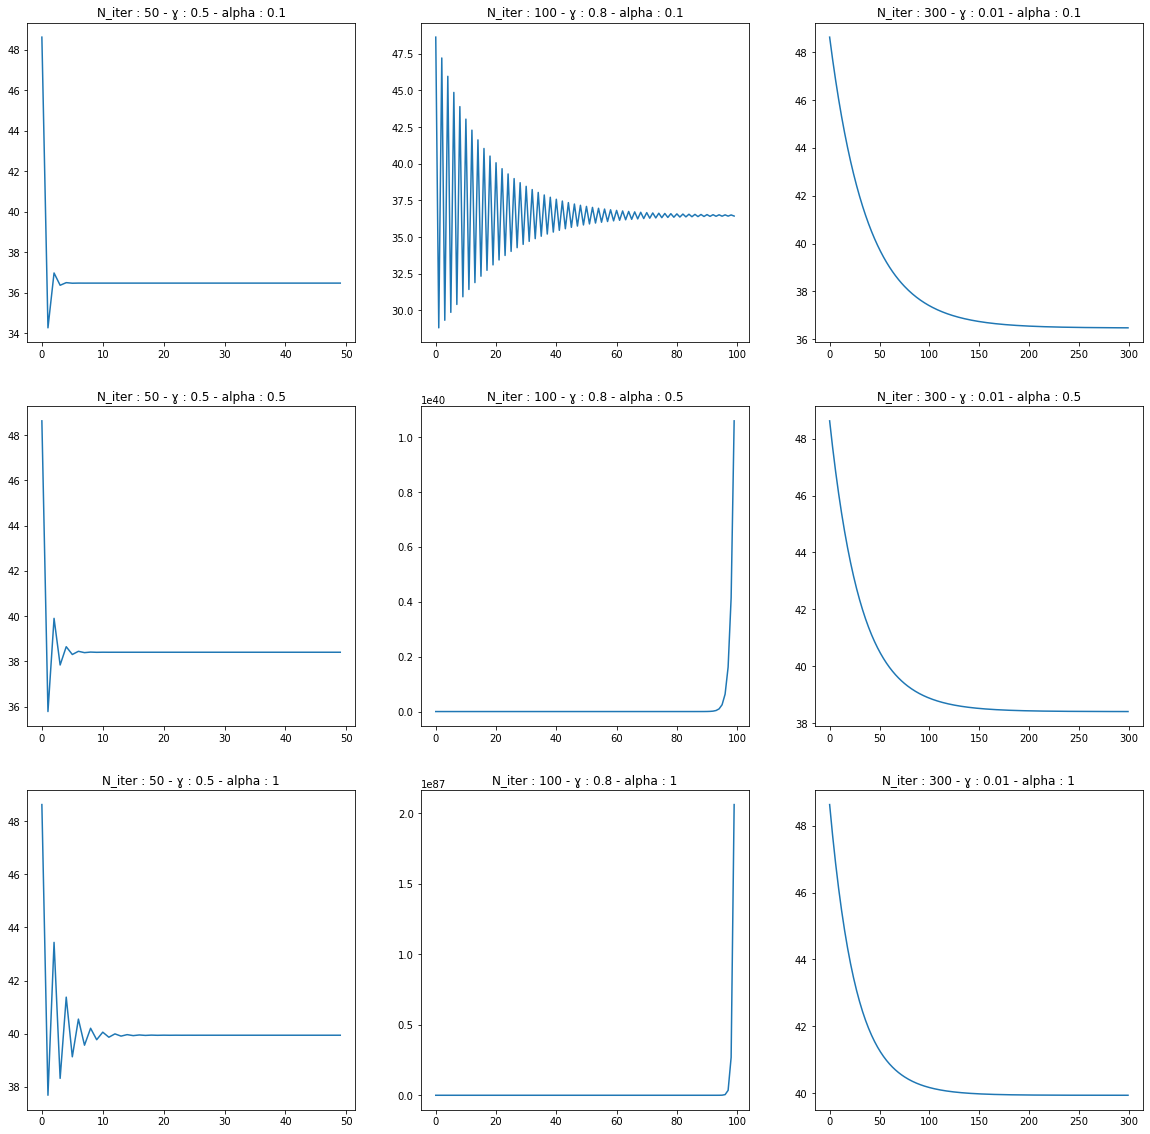

In [5]:
## QUESTION 7 -- Adding Regularization

fig, axs = plt.subplots(3,3, sharex='col', figsize=(20,20))
n_iters = [50, 100, 300]
gammas = [0.5, 0.8, 0.01]
alphas =  [0.1, 0.5, 1]
k=0
for j in range(len(gammas)) : 
    for i in range(len(n_iters)):
        k+=1
        n_iter = n_iters[i]
        gamma = gammas[i]
        alpha = alphas[j]
        ax = plt.subplot(3,3,k, title="N_iter : {} - ɣ : {} - alpha : {}".format(n_iter, gamma, alpha))        
        w_ini = np.zeros(X_toy.shape[1] + 1)
        w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                                 loss=loss, alpha=alpha, average=False)
        ax.plot(pobj)
        #ax.yscale('log')
        #ax.xlabel('t')
        #ax.ylabel('cost')
        #ax.title('%s stochastic (toy)' % loss)
        

In [ ]:
## QUESTION 7 -- Fading step

fig, axs = plt.subplots(3,3, sharex='col', figsize=(20,20))
n_iters = [500, 500, 500]
alphas =  [0.1, 1, 10]
k=0

def gamma(t):
            return 1. / (100 + t)
    
for j in range(len(gammas)) : 
    for i in range(len(n_iters)):
        k+=1
        n_iter = n_iters[i]
        alpha = alphas[j]     
        w_ini = np.zeros(X_toy.shape[1] + 1)
        #Gamma = gamma(n_iter)
        w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                                 loss=loss, alpha=alpha, average=False)
        ax = plt.subplot(3,3,k, title="N_iter : {} - ɣ : {} - alpha : {}".format(n_iter, gamma, alpha))   
        ax.plot(pobj)
        
        #ax.yscale('log')
        #ax.xlabel('t')
        #ax.ylabel('cost')
        #ax.title('%s stochastic (toy)' % loss)
        

In [6]:
############################################################################
#            Loading the data
############################################################################

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make the problem binary
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]

In [7]:
X.shape, y.shape

((100, 2), (100,))

In [12]:
############################################################################
#            visualizing the data
############################################################################

# A function for vizualizing the data and classification given by w
def plot_2d(X, y, w=None):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""
    plt.figure()
    symlist = ['o', 's', '+', 'x', 'D', '*', 'p', 'v', '-', '^']
    collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
               'fuchsia']

    labs = np.unique(y)
    idxbyclass = [y == labs[i] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.plot(X[idxbyclass[i], 0], X[idxbyclass[i], 1], '+',
                 color=collist[i % len(collist)], ls='None',
                 marker=symlist[i % len(symlist)])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    mx = np.min(X[:, 0])
    maxx = np.max(X[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=1.)
    plt.show()

In [13]:
#def decision_function(X, w):
#    """ fonction de prediction a partir d'un vecteur directeur"""
#    return np.dot(X, w[1:]) + w[0]


#def predict(X, w):
#    """ fonction de prediction de classe a partir d'un vecteur directeur"""
#    return np.sign(decision_function(X, w))

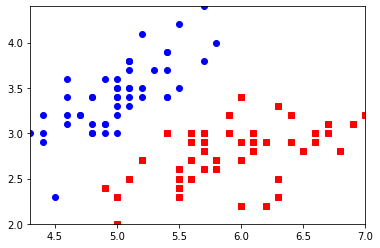

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
############################################################################
#            Displaying labeled data
############################################################################
plot_2d(X[:, :2], y)


# QUESTION 8
gamma = 0.05  # step size
n_iter = 1000  # number of iterations

loss = 'mse'
# loss = 'hinge'  # QUESTION 11

# Initialize w with just zeros
w_ini = np.zeros(X.shape[1] + 1)

w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss)
all_w

In [15]:
X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples) * 1e-5
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toyX = X_toy
y = y_toy

w_ini = np.zeros(X.shape[1] + 1)
w, all_w, pobj = stochastic_gradient(X, y_toy, gamma, n_iter, w_ini,
                                                 loss=loss, alpha=0, average=False)
w.shape, all_w.shape, pobj.shape, X.shape, y.shape

SyntaxError: cannot assign to operator (<ipython-input-15-420434afdbd6>, line 4)

In [27]:
############################################################################
#                Stochastic gradient
############################################################################


def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]


def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))


def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            if t % 100 ==0 : 
                print('Iter: ',t, '-', pobj[t])
                print(w)
            gradient = np.mean(np.dot(X,w)-y); # QUESTIONS 2 et 3
            if t % 100 ==0 :
                print(gradient)
            # Question 7
            if alpha != 0 : 
                pobj[t]  += alpha / 2 * np.mean(np.dot(w, w) ** 2)
                gradient += gradient + alpha * w
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 12
            raise NotImplementedError('QUESTION 12')
        w -= gamma * gradient
        
        if average is True:
            raise NotImplementedError('QUESTION 10')

        #if alpha > 0:
            #raise NotImplementedError('QUESTION 7')
        
        
        all_w[t] = w
    return w, all_w, pobj

In [44]:
n_samples = X.shape[0]
X2 = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
(y - np.dot(X2,w_ini))

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [28]:
X.shape, y.shape

((100, 2), (100,))

In [51]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make the problem binary
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]
X.shape, y.shape

((100, 2), (100,))

In [49]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
w_ini = np.zeros(X.shape[1] + 1)
w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini,
                                                 loss=loss, alpha=0.5, average=False)
w.shape, all_w.shape, pobj.shape, X.shape, y.shape

Iter:  0 - 0.5
[0. 0. 0.]
0.0
Iter:  100 - 0.5
[0. 0. 0.]
0.0
Iter:  200 - 0.5
[0. 0. 0.]
0.0
Iter:  300 - 0.5
[0. 0. 0.]
0.0
Iter:  400 - 0.5
[0. 0. 0.]
0.0
Iter:  500 - 0.5
[0. 0. 0.]
0.0
Iter:  600 - 0.5
[0. 0. 0.]
0.0
Iter:  700 - 0.5
[0. 0. 0.]
0.0
Iter:  800 - 0.5
[0. 0. 0.]
0.0
Iter:  900 - 0.5
[0. 0. 0.]
0.0


((3,), (1000, 3), (1000,), (100, 2), (100,))

<ipython-input-12-c971e8b32703>:27: RuntimeWarning: invalid value encountered in double_scalars
  plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
<ipython-input-12-c971e8b32703>:28: RuntimeWarning: invalid value encountered in double_scalars
  maxx * -w[1] / w[2] - w[0] / w[2]],


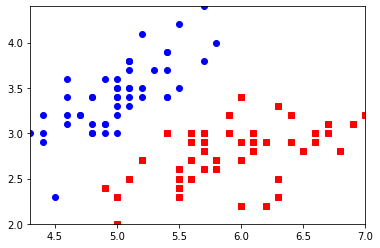

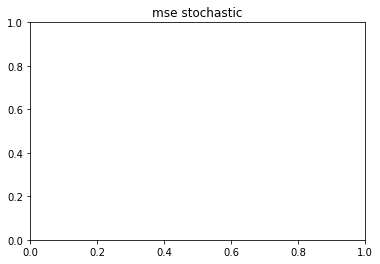

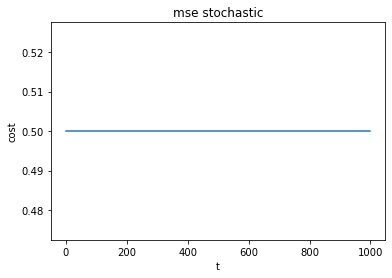

In [19]:
plot_2d(X, y, w)
plt.title('%s stochastic' % loss)

plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
plt.show()

In [6]:
############################################################################
#            Using Scikit-Learn
############################################################################

# QUESTION 13 : compare with SGDClassifier from Scikit-Learn